# Analyzing Seattle AirBnb Data

### Table of contents

<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#datawrangling'>Data Wrangling</a></li>
    <li><a href='#b_understanding'>Business Understanding</a></li>
    <li><a href='#u_exploration'>Univariate Exploration</a></li>
    <li><a href='#b_exploration'>Bivariate Exploration</a></li>
    <li><a href='#m_exploration'>Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I picked a Seattle AirBnb dataset. 
> The following Airbnb activity is included in this Seattle dataset:
> - Listings, including full descriptions and average review score
> - Reviews, including unique id for each reviewer and detailed comments
> - Calendar, including listing id and the price and availability for that day


<a id='datawrangling'></a>
## Data Wrangling/Understanding

In [55]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [56]:
# import datasets
reviews_df = pd.read_csv('datasets/reviews.csv')
listings_df = pd.read_csv('datasets/listings.csv')
calendar_df = pd.read_csv('datasets/calendar.csv')

In [57]:
# set the options to get better view on data
pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

#### Data Assessment

In [58]:
print('Reviews dataset shape:', reviews_df.shape)
print('Listings dataset shape:', listings_df.shape)
print('Calendar dataset shape:', calendar_df.shape)

Reviews dataset shape: (84849, 6)
Listings dataset shape: (3818, 92)
Calendar dataset shape: (1393570, 4)


In [59]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [60]:
reviews_df.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [68]:
reviews_id_df = reviews_df.groupby(['listing_id']).count()
reviews_id_df.sort_values('comments', ascending=False).head(10)

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
208356,474,474,474,474,474
365550,466,466,466,466,466
25002,404,404,404,404,404
47196,353,353,353,353,353
63308,320,320,320,320,320
92835,319,319,319,319,319
5682,297,297,297,297,296
279063,294,294,294,294,294
53867,287,287,287,287,287


In [69]:
reviews_id_df.sort_values('comments', ascending=False).tail(10)

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
6717555,1,1,1,1,1
6728017,1,1,1,1,1
8387068,1,1,1,1,1
3888986,1,1,1,1,1
8372562,1,1,1,1,1
3884805,1,1,1,1,1
8369321,1,1,1,1,1
8365938,1,1,1,1,1
8350401,1,1,1,1,1


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'scrape_id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'host_listings_count'}>,
        <AxesSubplot:title={'center':'host_total_listings_count'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'guests_included'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'maximum_nights'}>],
       [<AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>,
        <AxesSubplot:title={'center':'availability_90'}>,
        <Axe

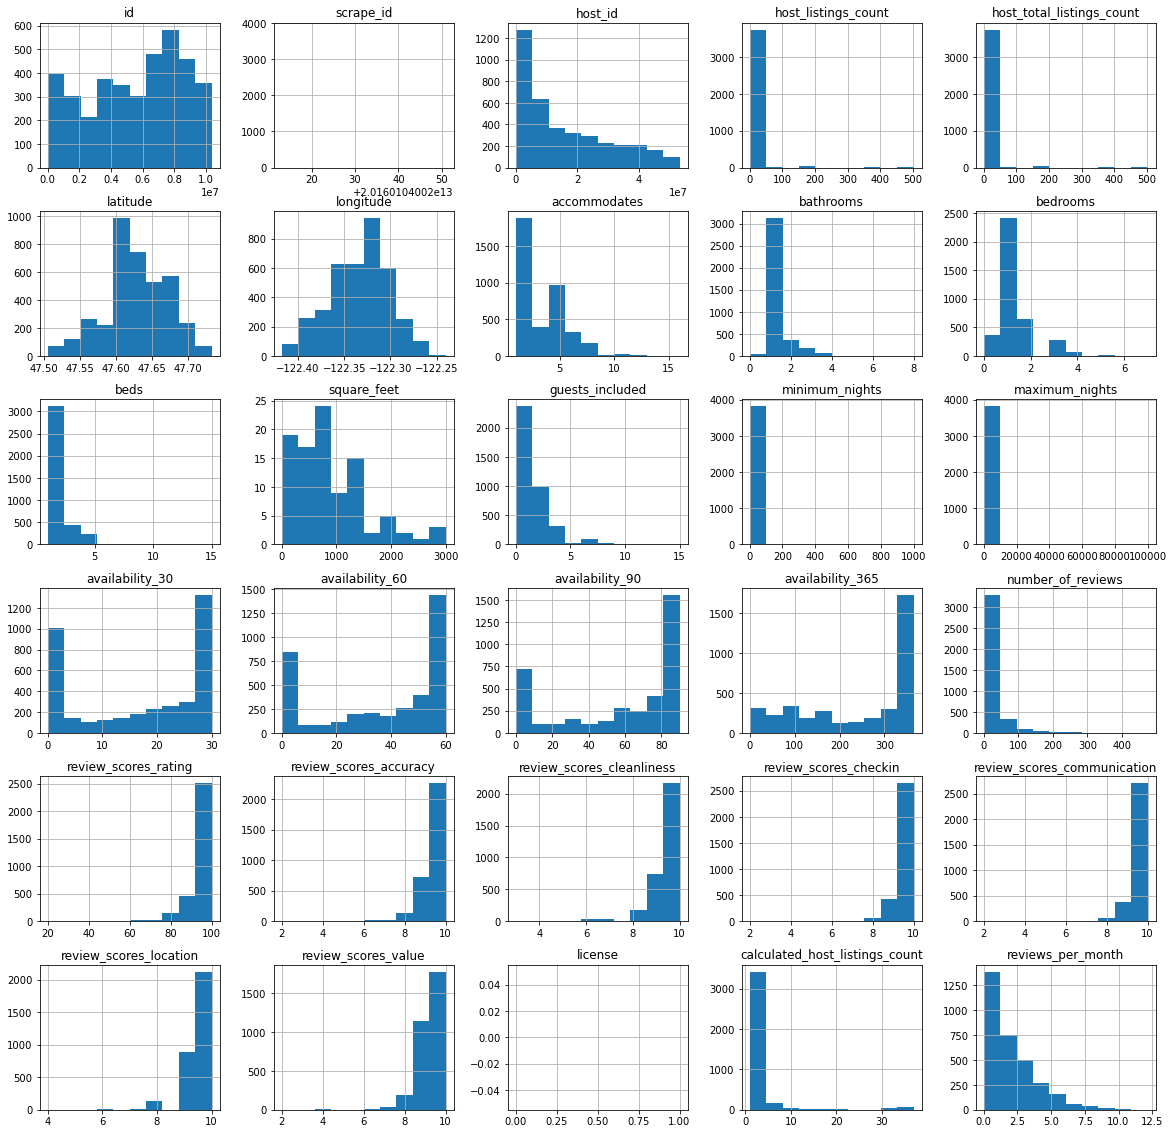

In [54]:
listings_df.hist(figsize=(20, 20))

In [78]:
top_10 = listings_df.sort_values('number_of_reviews', ascending=False).head(10)
last_10 = listings_df.sort_values('number_of_reviews', ascending=False).tail(10)
top_10['review_scores_value'].mean()
last_10['review_scores_value'].mean()

nan

In [41]:
listings_df[listings_df['id'] == 208356]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1447,208356,https://www.airbnb.com/rooms/208356,20160104002432,2016-01-04,contemporary art loft downtown [7],** Please read our entire listing description ...,This is studio #7 - one of two private airbnb ...,** Please read our entire listing description ...,none,This is a fun & interesting international neig...,Please note that there is a long flight of sta...,This is a great spot for public transportation...,https://a1.muscache.com/ac/pictures/1916190/08...,https://a1.muscache.com/im/pictures/1916190/08...,https://a1.muscache.com/ac/pictures/1916190/08...,https://a1.muscache.com/ac/pictures/1916190/08...,1025723,https://www.airbnb.com/users/show/1025723,Dirk & Jaq,2011-08-27,"Seattle, Washington, United States","Hi, we're a married couple living and working ...",within an hour,100%,100%,f,https://a0.muscache.com/ac/users/1025723/profi...,https://a0.muscache.com/ac/users/1025723/profi...,International District,3.0,3.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"S Main St, Seattle, WA 98104, United States",International District,International District,Downtown,Seattle,WA,98104,Seattle,"Seattle, WA",US,United States,47.599081,-122.325591,t,Loft,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$89.00,NaN,NaN,$250.00,NaN,1,$0.00,1,14,today,t,13,39,69,340,2016-01-04,474,2011-09-05,2015-12-24,95.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,f,strict,t,t,3,8.98


In [88]:
listings_df.groupby(['property_type']).count()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
property_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apartment,1708,1708,1708,1708,1708,1650,1404,1708,1708,1218,957,1252,1572,1572,1708,1572,1708,1708,1706,1706,1702,1265,1474,1474,1380,1706,1706,1706,1555,1706,1706,1708,1706,1706,1708,1512,1708,1708,1708,1708,1706,1708,1708,1708,1708,1708,1708,1708,1708,1708,1702,1704,1708,1708,1708,40,1708,855,665,802,1261,1708,1708,1708,1708,1708,1708,1708,1708,1708,1708,1708,1708,1439,1439,1428,1424,1425,1424,1426,1425,1425,1708,0,1708,1708,1708,1708,1708,1708,1439
Bed & Breakfast,37,37,37,37,37,35,35,37,37,30,26,31,37,37,37,37,37,37,37,37,37,35,30,30,27,37,37,37,36,37,37,37,37,37,37,35,37,37,37,37,36,37,37,37,37,37,37,37,37,37,37,37,37,37,37,1,37,19,12,9,17,37,37,37,37,37,37,37,37,37,37,37,37,26,26,26,26,26,26,26,26,26,37,0,37,37,37,37,37,37,26
Boat,8,8,8,8,8,7,6,8,8,4,4,4,8,8,8,8,8,8,8,8,8,5,5,5,2,8,8,8,6,8,8,8,8,8,8,6,8,8,8,8,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,2,8,2,2,2,5,8,8,8,8,8,8,8,8,8,8,8,8,5,5,5,4,5,5,5,5,5,8,0,8,8,8,8,8,8,5
Bungalow,13,13,13,13,13,13,13,13,13,11,6,12,11,11,13,11,13,13,13,13,13,8,13,13,13,13,13,13,12,13,13,13,13,13,13,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,0,13,7,5,5,10,13,13,13,13,13,13,13,13,13,13,13,13,9,9,9,9,9,9,9,9,9,13,0,13,13,13,13,13,13,9
Cabin,21,21,21,21,21,21,20,21,21,16,16,16,19,19,21,19,21,21,21,21,21,18,20,20,20,21,21,21,21,21,21,21,21,21,21,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,1,21,11,6,10,12,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,0,21,21,21,21,21,21,21
Camper/RV,13,13,13,13,13,11,10,13,13,6,6,6,13,13,13,13,13,13,13,13,13,10,10,10,9,13,13,13,11,13,13,13,13,13,13,9,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,0,13,6,3,5,8,13,13,13,13,13,13,13,13,13,13,13,13,10,10,10,10,10,10,10,10,10,13,0,13,13,13,13,13,13,10
Chalet,2,2,2,2,2,2,2,2,2,1,1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
Condominium,91,91,91,91,91,91,69,91,91,60,49,62,82,82,91,82,91,91,91,91,91,66,84,84,73,91,91,91,87,91,91,91,91,91,91,83,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,1,91,43,44,56,72,91,91,91,91,91,91,91,91,91,91,91,91,69,69,69,68,69,68,69,68,68,91,0,91,91,91,91,91,91,69
Dorm,2,2,2,2,2,2,1,2,2,1,1,1,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2


In [12]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [71]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


<a id='b_understanding'></a>
## Business Understanding

> After the Data Wrangling/Understanding part these are the questions I'm interested in tackling:
> 1. How does the total number of reviews correlates with the total review score?
> 2. What is the average price per property type?